## 七月在线机器学习实训营三期第六周(机器学习)考试
#### 考试说明:
- 起止时间：请同学在2018年3月16日至3月18日期间完成，最晚提交时间本周日（3月18日24时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试方式：请同学<font color=red><b>拷贝</b></font>该试卷至自己姓名的目录后，将文件更名为同学姓名拼音-exam6后，进行作答。例如wangwei-exam6
- 提交格式：请同学新建自己姓名全拼的文件夹，将该试卷，数据文件，zip文件等相关考试文件，放置此目录下。将该目录<b>移动</b>至/0.Teacher/Exam/4/目录下
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分不用填写

- 同学姓名:王玺
- 批改人： David
- 最终得分:100

<center><h1>####答卷开始####</h1></center>
<hr>

## 简答题(共4题，每题5分，共计20分)
- note: 20

#### 1. 请写出你了解的机器学习特征工程操作，以及它的意义（面试题）

特征工程是指从原始数据中提取出一系列能够良好表达数据集特点和分布的特征集，来组成更好的训练数据使模型和算法能达到最好性能和效果。     
特征工程包括特征使用方案，特征获取方案，特征处理和特征监控四个部分。    
其中特征处理是特征工程的核心部分，当数据预处理完成后，要选择有意义的特征输入机器学习的算法和模型进行训练。通常来说，从两个方面考虑来选择特征：    
&emsp;&emsp;1.特征是否发散：如果一个特征不发散，例如方差接近于0，也就是说样本在这个特征上基本上没有差异，这个特征对于样本的区分并没有什么用。      
&emsp;&emsp;2.特征与目标的相关性：与目标相关性高的特征，应当优先选择。  
根据特征选择的形式又可以将特征选择方法分为3种：   
&emsp;&emsp;Filter：过滤法，按照发散性或者相关性对各个特征进行评分，设定阈值或者待选择阈值的个数，选择特征。   
&emsp;&emsp;Wrapper：包装法，根据目标函数（通常是预测效果评分），每次选择若干特征，或者排除若干特征。   
&emsp;&emsp;Embedded：嵌入法，先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征。类似于Filter方法，但是是通过训练来确定特征的优劣。    
sklearn提供了较为完整的特征处理方法，包括数据预处理，数据变换，特征选择，降维等。           

#### 2.请写出上述特征工程操作的sklearn或者pandas实现方式


1.在数据预处理阶段sklearn提供了preproccessing库。   其中的StandardScaler类可以对数据进行标准化，MinMaxScaler类可以对数据进行区间缩放，Normalizer类可以对数据进行归一化，还可以用Binarizer类&emsp;对数据进行二值化，Imputer类可以对数据进行缺失值计算，PolynomialFeatures类可以对数据进行多项式转换。          
2.完成数据预处理后接下来sklearn提供了feature_selection库来进行特征选择。      
&emsp;1）过滤法（Filter）：VarianceThreshold类可以用方差选择特征，SelectKBest类可以结合相关系数来选择特征，SelectKBest类结合卡方检验来选择特征，SelectKBest类结合最大信息系数法来选择特征。   
&emsp;2）包装法（Wrapper）：RFE类可以进行迭代特征消除。RFE(estimator=LogisticRegression(), n_features_to_select=2).fit_transform(iris.data, iris.target)     
&emsp;3）嵌入法（Ebedded）：使用带惩罚项的基模型，除了筛选出特征外，同时也进行了降维。使用feature_selection库的SelectFromModel类结合带L1惩罚项的逻辑回归模型可以来选择特征比如：SelectFromModel(LR(threshold=0.5, C=0.1)).fit_transform(iris.data, iris.target)。使用SelectFromModel类结&emsp;合带L1以及L2惩罚项的逻辑回归模型来做的正选择为：SelectFromModel(LR(threshold=0.5, C=0.1)).fit_transform(iris.data, iris.target)    
3.当特征选择完成后，可以直接训练模型了，但是可能由于特征矩阵过大，导致计算量大，训练时间长的问题，因此降低特征矩阵维度也是必不可少的，在降维方面sklearn提供了decomposition库的PCA类来用主成分分析法降维；还有lda库的LDA类也可以用来降维。

#### 3.模型评估中的留一法，留出法，交叉验证分别是什么操作？

1）留出法(hold-out)：将数据集D划分为两个互斥的集合，其中一个集合用作训练集S，另一个作为测试集T，即D=SUT，S∩T=∅。在S上训练出的模型，用T来评估其测试误差，作为对泛化误差的近似估计。这种方法用起来简单但是最后验证准确性的高低受原始数据分类影响很大，不是很有说服力。    
2）交叉验证法(crossvalidation)：将数据集D划分为k个大小相似的互斥子集，即D=D1UD2U…UDk，Di∩Dj=∅（i≠j）；每个子集Di都尽可能保持数据分布的一致性，即从D中通过分层采样所得。训练时，每次用k-1个子集的并集作为训练集，余下的一个子集作为测试集；如此，可获得k组训练集和测试集，从而进行k次训练和测试，最终返回k次测试结果的均值。k值决定了交叉验证法评估结果的稳定性和保真性，因此也称为k折交叉验证或k倍交叉验证。   
3）留一法：假设样本数据集中有N个样本数据。将每个样本单独作为测试集，其余N-1个样本作为训练集，这样得到了N个分类器或模型，用这N个分类器或模型的分类准确率的平均数作为此分类器的性能指标。这个方法优点是每一个模型都是用几乎所有的样本来训练模型，最接近样本，这样评估所得的结果比较可靠。实验没有随机因素，整个过程是可重复的。缺点是计算成本高，当N非常大时，计算很耗时。   


#### 4.如何理解模型的过拟合与欠拟合，以及如何解决？（面试题）

欠拟合就是模型没有很好地捕捉到数据特征，不能够很好地拟合数据。解决方法：   
1）添加其他特征项，特征项不够导致的，可以添加其他特征项来很好地解决。比如可以通过已有特征的一些计算或者组合产生新的特征。    
2）添加多项式特征，这个在机器学习算法里面用的很普遍，例如将线性模型通过添加二次项或者三次项使模型更能刻画数据特征。   
3）减少正则化参数，正则化的目的是用来防止过拟合的，但是现在模型出现了欠拟合，则需要减少正则化参数。   
过拟合就是就是模型把训练集数据学习的太彻底，以至于把噪声数据的特征也学习到了，这样就会导致在后期测试的时候不能够很好地识别测试集数据，模型泛化能力太差。解决方法：   
1）重新清洗数据，导致过拟合的一个原因也有可能是数据不纯导致的，如果出现了过拟合就需要我们重新清洗数据。   
2）增大数据的训练量，还有一个原因就是我们用于训练的数据量太小导致的，训练数据占总数据的比例过小。   
3）添加正则化项。     
4）采用dropout方法。这个方法在神经网络里面很常用。dropout方法是ImageNet中提出的一种方法，它可以在训练的时候让神经元以一定的概率不工作。

## 操作题(共1题，共计80分)
- note:80

### 信用卡欺诈项目(共7项，前5项每题10分，6，7题每题15分)

- 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('/home/sxy-s3/0.Teacher/Exam/KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
data.shape

(112915, 11)

In [3]:
data.isnull().sum(axis=0)
data.shape

(112915, 11)

In [4]:
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
X.shape

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


(108648, 10)

In [5]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
y.mean()
X.shape

(108648, 10)

- 1.把数据切分成训练集和测试集

In [6]:
# 各种导包
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
import numpy as np
import matplotlib.pyplot as plt
import warnings
import numpy as np

In [7]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [8]:
# 标准化 StandardScaler类可以保存训练集中的参数（均值、方差）直接使用其对象转换测试集数据。
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

- 2.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [10]:
feat_labels=data.columns[1:]
coefs=lr.coef_
indices=np.argsort(coefs[0])[::-1]

for f in range(X_train.shape[1]):
    print ('%-*s %f'%(36,feat_labels[indices[f]],coefs[0,indices[f]]))

NumberOfTime30-59DaysPastDueNotWorse 1.728691
NumberOfTimes90DaysLate              1.689949
DebtRatio                            0.312079
NumberOfDependents                   0.116384
RevolvingUtilizationOfUnsecuredLines -0.014273
NumberOfOpenCreditLinesAndLoans      -0.091872
MonthlyIncome                        -0.115345
NumberRealEstateLoansOrLines         -0.196397
age                                  -0.364292
NumberOfTime60-89DaysPastDueNotWorse -3.248708


如上所示exp（系数）的大小反应了这个变量对分类结果的影响程度。系数的正负则反映了这个影响是正向的还是反向的。比如，NumberOfTimes90DaysLate的系数为1.689949，exp（1.689949）是大于1的，这表示自变量x每增加一个单位，y发生的几率是原来的exp（1.689949）倍；相反age的系数为-0.3248708，exp（-0.3248708）小于1，表示自变量x每增加一个单位，y发生的几率缩小为原来的exp（-0.3248708）。绝对值大的参数对应的特征也许会比较重要。

- 3.使用决策树/SVM/KNN...等sklearn分类算法进行分类，尝试了解参数含义，调整不同的参数。

In [11]:
# 决策树
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
print(tree.fit(X_train_std, y_train))
print('准确度：%f'%tree.score(X_train_std,y_train))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
准确度：0.934217


criterion：表示在基于特征划分数据集合时，选择特征的标准。默认是gini，即'Gini impurity'(Gini不纯度)，还可以是criterion='entropy'。Gini不纯度表示该Gini度量是指随机选择集合中的元素，根据集合中label的分布将该元素赋予分类，该元素分类错误的几率。entropy则表示采用信息增益来选择特征。

splitter：表示在构造树时，选择结点的原则，默认是splitter='best'，即选择最好的特征点分类，比如基于信息增益分类时，则选择信息增益最大的特征点，还可以是'random'随机的。

max_features：这个参数表示在划分数据集时考虑的最多的特征值数量，根据数据类型表示的意义也不同（默认为None）：    
&#8195;&emsp;&emsp;&emsp;&emsp;&emsp;1. int，在每次分类是都要考虑max_features个特征。    
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;2. float,那么max_features是一个百分率并且分类时需要考虑的特征数是int(max_feature*n_features,其中n_features是训练完成时发特征数)。     
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;3. auto,max_features=sqrt(n_features)    
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;4. sqrt,max_features=sqrt(n_features)    
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;5. log2,max_features=log2(n_features)    
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;6. None，max_features=n_features    
  

max_depth：表示树的最大深度,如果是"None",则节点会一直扩展直到所有的叶子都是纯的或者所有的叶子节点都包含少于min_samples_split个样本点。忽视max_leaf_nodes是不是为None。

min_samples_split：表示在分解内部结点时最少的样本数,默认为2。如果是float，min_samples_split是一个百分率并且ceil(min_samples_split*n_samples)是每个分类需要的样本数。

min_samples_leaf：表示每个叶结点最小的样本数目，默认为1。如果是float，则它是一个百分率并且ceil(min_samples_leaf*n_samples)是每个节点所需的样本数。
    
min_weight_fraction_leaf：一个叶节点的输入样本所需要的最小的加权分数，默认为0。

max_leaf_nodes:int,None 可选（默认为None），在最优方法中使用max_leaf_nodes构建一个树。最好的节点是在杂质相对减少。如果是None则对叶节点的数目没有限制。如果不是None则不考虑max_depth.
class_weight：一个字典列表，'balanced'，None，optional(default=None)，主要是考虑每个类的权重{class_label: weight}

min_impurity_split：树增长停止阈值，仅仅当他的impurity超过阈值时才会继续向下分解，否则会成为叶结点

class_weight:可以是字典列表,"Banlanced" 或者 None,（默认为None）。表示在表{class_label:weight}中的类的关联权值。如果没有指定，所有类的权值都为1。对于多输出问题，一列字典的顺序可以与一列y的次序相同。值为"balanced"时模型使用y的值去自动适应权值，并且是以输入数据中类的频率的反比例。

random_state:取值为int,RandomState instance 或者 None。如果是int,random_state 是随机数字发生器的种子；如果是RandomState，random_state是随机数字发生器，如果是None，随机数字发生器是np.random使用的RandomState instance.

persort:bool,可选（默认为False）。表示在进行拟合前，是否预分数据来加快数的构建。对于数据集非常庞大的分类，presort=true将导致整个分类变的缓慢；当数据集较小，且数的深度有限制，presort=true才会加速分类

剩下的就是该模型的一些属性，比如classes_，feature_importances_，max_features_，n_classes_，n_features_， n_outputs_，tree_

In [88]:
# SVM
X_train_std=pd.DataFrame(X_train_std,columns=feat_labels)
X_test_std=pd.DataFrame(X_test_std,columns=feat_labels)
from sklearn.svm import SVC
svm = SVC()
print(svm.fit(X_train_std, y_train))
print('准确度：%f'%svm.score(X_train_std,y_train))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
准确度：0.934348


C：C-SVC的惩罚参数C默认值是1.0。C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样对训练集测试时准确率很高，但泛化能力弱。C值小，对误分类的惩罚减小，允许容错，将他们当成噪声点，泛化能力较强。也是一种正则化。

kernel：核函数，默认是rbf，可以是‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’     
&emsp;&emsp;&emsp;&emsp;线性：u'v;   
&emsp;&emsp;&emsp;&emsp;多项式：(gamma*u'*v + coef0)^degree;   
&emsp;&emsp;&emsp;&emsp;RBF函数：exp(-gamma|u-v|^2);   
&emsp;&emsp;&emsp;&emsp;sigmoid：tanh(gamma*u'*v + coef0);   
degree ：多项式poly函数的维度，默认是3，选择其他核函数时会被忽略。           

gamma ：'rbf','poly'和'sigmoid'的核函数参数。默认是'auto'，则会选择1/n_features       
  
coef0 ：float类型，可选，默认为0.0 在核函数中是独立的，是'poly','sigmoid’函数中的 r 。       

probability ：布尔类型，默认为False ,决定是否启用概率估计。需要在训练fit()模型时加上这个参数，之后才能用相关的方法：predict_proba和predict_log_proba。    

shrinking ：是否采用shrinking heuristic方法，默认为true    

tol ：停止训练的误差值大小，默认为1e-3   

cache_size ：核函数cache缓存大小，默认为200   

class_weight ：类别的权重，字典形式传递。设置第几类的参数C为weight*C(C-SVC中的C)   

verbose ：允许冗余输出   

max_iter ：求解器中的迭代次数限制，如果是-1表示没有限制。   

decision_function_shape ：‘ovo’, ‘ovr’ or None, default=None。决策函数的类型。多分类情况使用可以选择“ovo”(one vs one 的缩写)，“ovr”(one vs rest的缩写)，否则默认是None。    

random_state ：数据洗牌时的种子值，int值   

In [13]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski',n_jobs=-1)
print(knn.fit(X_train, y_train))
print('准确度：%f'%knn.score(X_train_std,y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
准确度：0.932218


algorithm：对于这个参数，一共有4种可选输入，'brute'对应蛮力算法，'kd_tree'对应KD树算法，'ball_tree'对应球树算法，'auto'则会在上面三种算法中做权衡，选择一个拟合最好的最优算法。如果输入样本特征是稀疏的时候，无论我们选择哪种算法，最后scikit-learn都会去用蛮力实现‘brute’。   

leaf_size:这个值控制了使用KD树或者球树时， 停止建子树的叶子节点数量的阈值。这个值越小，则生成的KD树或者球树就越大，层数越深，建树时间越长，反之，则生成的KD树或者球树会小，层数较浅，建树时间较短。默认是30.    

metric: 距离度量,默认的是欧式距离（即p=2的闵可夫斯基距离）可以使用的距离度量参数有：   
a) 欧式距离 “euclidean”    
b) 曼哈顿距离 “manhattan”    
c) 切比雪夫距离“chebyshev”    
d) 闵可夫斯基距离 “minkowski”    
e) 带权重闵可夫斯基距离 “wminkowski”    
f) 标准化欧式距离 “seuclidean”    
g) 马氏距离“mahalanobis”    

p:p是使用距离度量参数 metric 附属参数，只用于闵可夫斯基距离和带权重闵可夫斯基距离中p值的选择，p=1为曼哈顿距离， p=2为欧式距离。默认为2

n_jobs：主要用于多核CPU时的并行处理，加快建立KNN树和预测搜索的速度。一般用默认的-1就可以了，即所有的CPU核都参与计算。

n_neighbors：K值的选择与样本分布有关，一般选择一个较小的K值，可以通过交叉验证来选择一个比较优的K值，默认值是5。如果数据是三维或者三维以下的，可以通过可视化观察来调参。   

weights：主要用于标识每个样本的K个近邻样本的权重。可以选择"uniform","distance" 或者自定义权重。选择默认的"uniform"，意味着所有最近邻样本权重都一样，在做预测时一视同仁。如果是"distance"，则权重和距离成反比例，即距离预测目标更近的近邻具有更高的权重，这样在预测类别时，更近的近邻所占的影响因子会更加大。还有可以自定义权重，即自定义一个函数，输入是距离值，输出是权重值。可以自己控制不同的距离所对应的权重。      
如果样本的分布是比较成簇的，即各类样本都在相对分开的簇中时，用默认的"uniform"就可以了，如果样本的分布比较乱，规律不好寻找，选择"distance"会好些。如果用"distance"发现预测的效果的还是不好，可以考虑自定义距离权重来调优这个参数。   

- 4.在测试集上进行预测，计算准确度

In [14]:
# LR
y_pred_lr=lr.predict(X_test)
print('错误分类数: %d' % (y_test != y_pred_lr).sum())
print ('测试集准确度：%f'%lr.score(X_test_std,y_test))

错误分类数: 2171
测试集准确度：0.933886


In [15]:
# 决策树
y_pred_tree=tree.predict(X_test)
print('错误分类数: %d' % (y_test != y_pred_tree).sum())
print('测试集准确度：%f'%tree.score(X_test_std,y_test))

错误分类数: 2498
测试集准确度：0.935021


In [77]:
# SVM
y_pred_svm=svm.predict(X_test)
print('错误分类数: %d' % (y_test != y_pred_svm).sum())
print('测试集准确度：%f'%svm.score(X_test_std,y_test))

错误分类数: 2171
准确度：0.934714


In [16]:
# KNN
y_pred_knn=knn.predict(X_test)
print('错误分类数: %d' % (y_test != y_pred_knn).sum())
print('测试集准确度：%f'%knn.score(X_test,y_test))

错误分类数: 2213
测试集准确度：0.932106


- 5.查看sklearn的官方说明，了解混淆矩阵等评估标准，并对此例进行评估。

混淆矩阵的形式如下所示：   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Predicted   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Negative&emsp;&emsp;&emsp;Positive    
Actual&emsp;Negative&emsp;&emsp;&emsp;a&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;b    
&emsp;&emsp;&emsp;&emsp;Positive&emsp;&emsp;&emsp; c&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;d   

a 是真实负样本被正确分类为负样本的数目   
b 是真实负样本被错误分类为正样本的数目   
c 是真实正样本被错误分类为负样本的数目   
d 是真实正样本被正确分类为正样本的数目  

1.准确率：  
准确率=正确预测的正反例数/总数   
Accuracy=true positive and true negative/total cases= a+d/a+b+c+d  

2误分类率:     
误分类率=错误预测的正反例数/总数   
Error rate=false positive and false negative/total cases=b+c/a+b+c+d=1-Accuracy

3.覆盖率(正例)：   
覆盖率=正确预测到的正例数/实际正例总数   
Recall(True Positive Rate，or Sensitivity)=true positive/total actual positive=d/c+d

4.命中率：     
命中率=正确预测到的正例数/预测正例总数    
Precision(Positive Predicted Value,PV+)=true positive/ total predicted positive=d/b+d

5.Specificity(负覆盖率)：  
负例的覆盖率=正确预测到的负例个数/实际负例总数   
Specificity(True Negative Rate)=true negative/total actual negative=a/a+b

6.PV-:   
负例的命中率=正确预测到的负例个数/预测负例总数   
Negative predicted value(PV-)=true negative/total predicted negative=a/a+c

In [17]:
# LR模型
import pylab as pl
from sklearn.metrics import confusion_matrix
cnf_matrix_lr=confusion_matrix(y_test, y_pred_lr)
cnf_matrix_lr

array([[30424,     0],
       [ 2171,     0]])

如上所示，准确率为30424/（30424+2171）= 0.933886  模型在预测实际未违约的人未违约（negative-negative）方面表现良好，在预测实际违约的人违约方面表现较差差，出现了2171个违约的人被当做了未违约。

[[30424     0]
 [ 2171     0]]


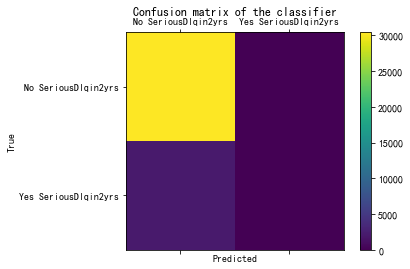

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cnf_matrix_lr=confusion_matrix(y_test, y_pred_lr)
labels = ['No SeriousDlqin2yrs', 'Yes SeriousDlqin2yrs']
print(cnf_matrix_lr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix_lr)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
# 决策树
cnf_matrix_tree=confusion_matrix(y_test, y_pred_tree)
cnf_matrix_tree

array([[29346,  1078],
       [ 1420,   751]])

如上所示这个模型在给违约人分类为违约人方面比LR模型表现要好些。但是覆盖率还是不太高751/(1420+751)。

In [96]:
# svm
cnf_matrix_svm=confusion_matrix(y_test, y_pred_svm)
cnf_matrix_svm

array([[30424,     0],
       [ 2171,     0]], dtype=int64)

In [20]:
# KNN
cnf_matrix_knn=confusion_matrix(y_test, y_pred_knn)
cnf_matrix_knn

array([[30351,    73],
       [ 2140,    31]])

- 6.银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。   
比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [21]:
lr = LogisticRegression(penalty='l2',C=1000.0, random_state=0,class_weight={1:0.3,0:0.7})
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
print('错误分类数: %d' % (y_test != y_pred_lr).sum())
print( '准确度：%f'%lr.score(X_test,y_test))
cnf_matrix_lr=confusion_matrix(y_test, y_pred_lr)
cnf_matrix_lr

错误分类数: 2169
准确度：0.933456


array([[30410,    14],
       [ 2155,    16]])

这一次预测可能违约的人明显多了一些，确实检测出了更多的违约的人，但是也有一部分未违约的人被预测违约了。

- 7.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

1）尝试用随机森林算法可以计算每一个属性的重要性。根据这个值对各个特征排序，然后选出4个特征重新建模。

In [50]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = data.columns[1:]
forest=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
forest.fit(X_train,y_train)
importances=forest.feature_importances_
import numpy as np
feat_labels=data.columns[1:]
indices=np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print ('%2d) %-*s %f'%(f,30,feat_labels[indices[f]],importances[indices[f]]))

 0) RevolvingUtilizationOfUnsecuredLines 0.187480
 1) DebtRatio                      0.172384
 2) MonthlyIncome                  0.166640
 3) age                            0.122597
 4) NumberOfOpenCreditLinesAndLoans 0.089066
 5) NumberOfTimes90DaysLate        0.088948
 6) NumberOfTime30-59DaysPastDueNotWorse 0.051642
 7) NumberOfDependents             0.046203
 8) NumberOfTime60-89DaysPastDueNotWorse 0.043248
 9) NumberRealEstateLoansOrLines   0.031794


In [87]:
newX_train=X_train_std[['RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome','age']]
newX_test=X_test_std[['RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome','age']]

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2',C=1000.0, random_state=0)
lr.fit(newX_train, y_train)

print('训练集准确度：%f'%lr.score(newX_train,y_train))

y_pred_lr=lr.predict(newX_test)
print('错误分类数: %d' % (y_test != y_pred_lr).sum())

print ('测试集准确度：%f'%lr.score(newX_test,y_test))
cnf_matrix_lr=confusion_matrix(y_test, y_pred_lr)
cnf_matrix_lr

训练集准确度：0.932218
错误分类数: 2171
测试集准确度：0.933395


array([[30424,     0],
       [ 2171,     0]])

跟本来的结果比没什么变化，看来几个重要的特征确实可以很大程度上主导模型的训练结果。

2）下面试试循环特征消减法(Recursive Feature Elimination)

In [25]:
from sklearn.feature_selection import RFE
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=4)
rfe.fit(X_train_std,y_train)
print(rfe.support_) 
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f'%(f,36,feat_labels[indices[f]],rfe.support_[f]))

[False  True  True False False False  True False  True False]
 0) RevolvingUtilizationOfUnsecuredLines 0.000000
 1) DebtRatio                            1.000000
 2) MonthlyIncome                        1.000000
 3) age                                  0.000000
 4) NumberOfOpenCreditLinesAndLoans      0.000000
 5) NumberOfTimes90DaysLate              0.000000
 6) NumberOfTime30-59DaysPastDueNotWorse 1.000000
 7) NumberOfDependents                   0.000000
 8) NumberOfTime60-89DaysPastDueNotWorse 1.000000
 9) NumberRealEstateLoansOrLines         0.000000


In [86]:
newX_train=X_train_std[['DebtRatio','MonthlyIncome','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse']]
newX_test=X_test_std[['DebtRatio','MonthlyIncome','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse']]

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2',C=1000.0, random_state=0)
lr.fit(newX_train, y_train)

print('训练集准确度：%f'%lr.score(newX_train,y_train))

y_pred_lr=lr.predict(newX_test)
print('错误分类数: %d' % (y_test != y_pred_lr).sum())

print ('测试集准确度：%f'%lr.score(newX_test,y_test))
cnf_matrix_lr=confusion_matrix(y_test, y_pred_lr)
cnf_matrix_lr

训练集准确度：0.932376
错误分类数: 2172
测试集准确度：0.933364


array([[30376,    48],
       [ 2124,    47]])

准确度几乎一样，混淆矩阵有一点点不同,这一批特征使得模型在预测违约方面敏感了一点点。

### 本阶段课程意见反馈题(5分送分项，非必答)
#### 请同学围绕以下两点进行回答：
- 自身总结：请您对您自己在本周课程的学习，收获，技能掌握等方面进行一次总结 ，也包括有哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。


- 课程反馈：请就知识点，进度，难易度，教学方式，考试方式及难易度等方面向我们反馈，督促我们进行更有效的改进。

<hr>
<center><h1>####答卷结束####</h1></center>